0.8186779950602296


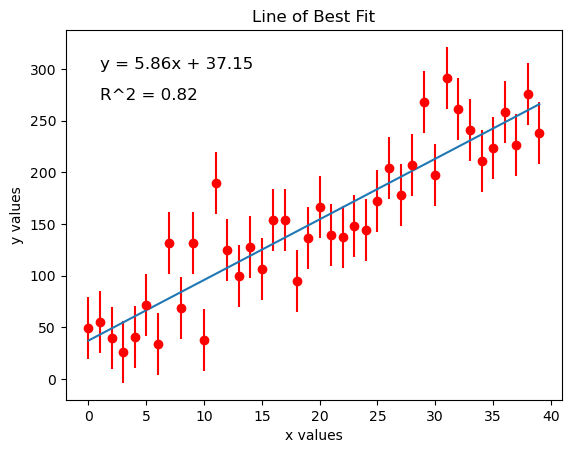

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import os
from astropy.table import Table
%matplotlib inline
#from scipy.optimize import curve_fit
from scipy import stats

#Ignoring uncertainties

#Setting up path
specdir = '/Users/EvanB.LAPTOP-8CHCIOMA/astr503/my_repositories/Intro_Python_Project'
os.chdir(specdir)

#Reading data
data = Table.read('data.v3.txt',format='ascii', names=('x','y','dy'))

#Putting data into numpy arrays
x = np.array(data['x'])
y = np.array(data['y'])
dy = np.array(data['dy'])

#Finding averge y value
mean_y = y.mean()

#Estimating coefficients and constants
a, b = np.polyfit(x, y, 1)

#Determining R^2 value
xx=np.linspace(0,39,40)
yy=a*xx+b
E1 = sum((y-yy)**2) #Residual sum of squares
E2 = sum((y-mean_y)**2) #Regression sum of squares
r2 = 1-(E1/E2)
print(r2)

#Plot Formatting
plt.title('Line of Best Fit')
plt.xlabel('x values')
plt.ylabel('y values')

#Adding error bars
plt.errorbar(x, y, color = 'r', label = 'data', yerr=dy, fmt="o")

#Fitting and plotting linear function
plt.plot(x, a*x+b)

#Displaying fit parameters
plt.text(1, 300, 'y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b), size=12)
plt.text(1, 270, 'R^2 = ' + '{:.2f}'.format(r2), size=12)
plt.show()

0.7803716839427781


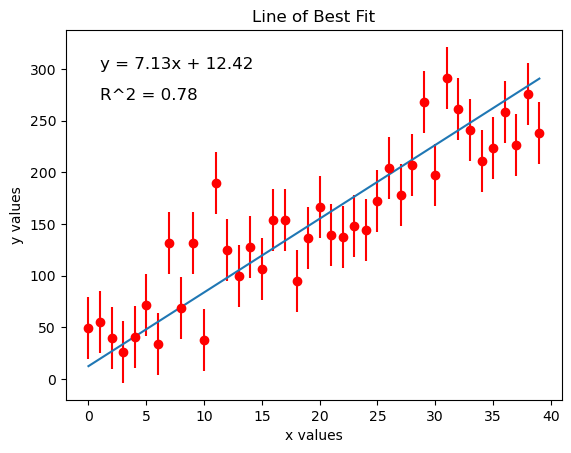

In [9]:
#Taking uncertainties into account

specdir = '/Users/EvanB.LAPTOP-8CHCIOMA/astr503/my_repositories/Intro_Python_Project' #'/astr503/my_repositories/Intro_Python_Project/'
os.chdir(specdir)

data = Table.read('data.v3.txt',format='ascii', names=('x','y','dy'))

x = np.array(data['x'])
y = np.array(data['y'])
dy = np.array(data['dy'])

#Finding averge y value
mean_x = x.mean()
mean_y = y.mean()

#Finds covariance of x and y
Cov = np.cov([x-mean_x,y-mean_y])
evals, evecs = np.linalg.eig(Cov)

#Finds new a and b values using the covariance functions above
a = evecs[1,evals.argmax()]/evecs[0,evals.argmax()]
b = mean_y-a*mean_x

#Determining R^2 value
xx=np.linspace(0,39,40)
yy=a*xx+b
E1 = sum((y-yy)**2) #Residual sum of squares
E2 = sum((y-mean_y)**2) #Regression sum of squares
r2 = 1-(E1/E2)
print(r2)

#Formatting
plt.title('Line of Best Fit')
plt.xlabel('x values')
plt.ylabel('y values')

#Error bars 
plt.errorbar(x, y, color = 'r', label = 'data', yerr=dy, fmt="o")

#Plotting new line of best fit
plt.plot(xx, yy)

#Displaying fit parameters
plt.text(1, 300, 'y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b), size=12)
plt.text(1, 270, 'R^2 = ' + '{:.2f}'.format(r2), size=12)
plt.show()

In [7]:
#Using a subroutine

#Defines a line fitting function that does everything outlined above and returns a plot
def line_fit(x,y,dy):
    mean_x = x.mean()
    mean_y = y.mean()

    Cov = np.cov([x-mean_x,y-mean_y])
    evals, evecs = np.linalg.eig(Cov)

    a = evecs[1,evals.argmax()]/evecs[0,evals.argmax()]
    b = mean_y-a*mean_x
    xx=np.linspace(0,39,40)
    yy=a*xx+b
    E1 = sum((y-yy)**2) #Residual sum of squares
    E2 = sum((y-mean_y)**2) #Regression sum of squares
    r2 = 1-(E1/E2)
    plt.title('Line of Best Fit')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.errorbar(x, y, color = 'r', label = 'data', yerr=dy, fmt="o")
    plt.plot(xx, yy)
    plt.text(1, 300, 'y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b), size=12)
    plt.text(1, 270, 'R^2 = ' + '{:.2f}'.format(r2), size=12)
    return plt.show()

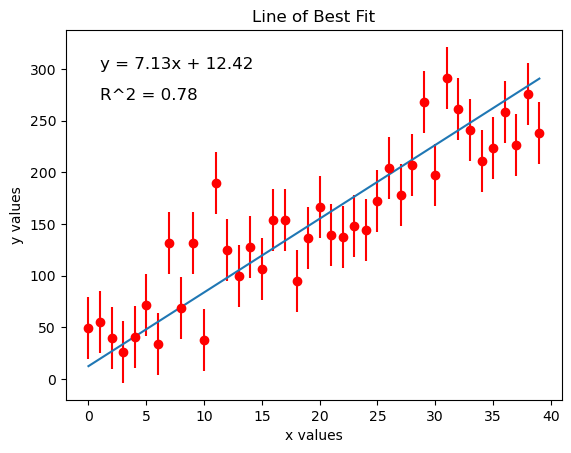

None

In [8]:
#Displaying plot by calling subroutine
display(line_fit(x,y,dy))

In [ ]:
#If the R^2 values I got are to be believed, my estimates were decent fits for the data. 
#It looks like the line ignoring the uncertainty was actually a better fit for this data set.
#I'm sure there are nonlinear possibly polynomial functions that might fit better but the linear functions seem to fit
#the trend of this dataset fine.